<h1>Support Vector Machine</h1>

SVM is a powerful supervised learning algorithm used for both classification and regression task. SVM works by finding the optimal hyperplane that best separates the classes in the feature space.

<h2>Key Concepts</h2>

1. Hyperplane: In SVM, the hyperplane is the decision boundary in the feature space. The dimension of hyperspace depends upon the number of features. If the number of input features is two, then hyper plane is just a line. If the number of input features is three, then the hyperplane becomes a 2D Plane.

2. Margin: It is the distance between the hyperplane and observations closest to the hyperplane(support vectors). In SVM large margin is considered a good margin.

* Hard Margin: If the training data is linearly separable
* Soft Margin: If the data are not fully linearly separable

<h2>Types of SVM</h2>

<h3>Linear SVM</h3>

* Use a linear decision boundary to separate the data points of different classes
* Single straight line can divide the points into respective classes


<h3>Non-Linear SVM</h3>

* Used to classify data when it cannot be separated into two classes by a straight line.
* Using kernel functtions, nonlinear SVMs can handle non linearly separable data (gaussian kernel, sigmoid & polynomial kernel)
* A linear SVM is used to locate a non linear decision boundary in this modified space


<h2>Pros and Cons of SVM</h2>
<h3>Pros</h3>

* Accuracy
* Works well on smaller cleaner datasets
* More effiecient on Higher dimensional spaces

<h3> Cons</h3>

* Isn't suited to larger datasets as the training time with SVMs can be high
* Less effective or noiser datasets with overlapping classes

<h2>Applications of SVM in a real life</h2>

* Face Detection
* Image Classifier
* Bio-Informatics
* Text and HyperText Categorization
* Handwriting Recognization


<h2>Demo</h2>

<h3>Import Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2


from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

<h3>Load Dataset</h3>

In [15]:
# Converting Images into numpy array for easyness of processing

def load_mnist_data(data_dir):
    images = []
    labels = []

    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                # Read the Image
                image_path = os.path.join(root, file)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                # Resize the Image
                image = cv2.imread(image_path, (28, 28))

                # Flatten image and append to images list
                images.append(image.flatten())

                # Extract label from the root folder name
                label = int(os.path.basename(root))
                labels.append(label)

    return np.array(images), np.array(labels)

In [18]:
data_dir = "data/trainingSet"
images, labels = load_mnist_data(data_dir)

Note: Dataset didnot upload on github because of huge file

<h3>Save in .npy file. So loading is easier

In [19]:
np.save('data/mnist_data.npy', {'images': images, 'labels': labels})

<h3>Load .npy file</h3>

In [27]:
# Load the MNIST data from .npy file
data = np.load('data/mnist_data.npy', allow_pickle=True)
images = data.item().get('images')
labels = data.item().get('labels')

<h3>Visualize</h3>

In [28]:
import random

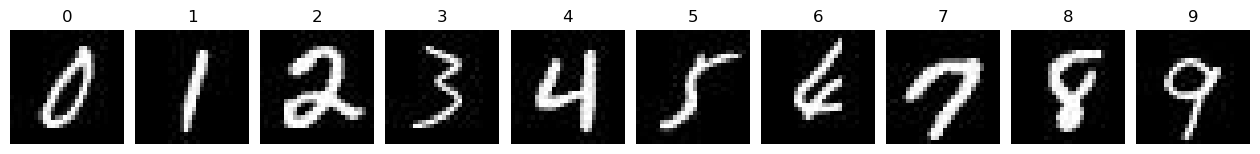

In [30]:
def random_value_for_index(labels, target_value):
    indices = [index for index, value in enumerate(labels) if value == target_value]
    return random.choice(indices)

# Define categories
categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Create subplots
fig, axs = plt.subplots(1, 10, figsize=(16, 16))

for index, category in enumerate(categories):
    # Select random image index from specific category
    random_index = random_value_for_index(labels, category)
    # Plot the random image
    axs[index].imshow(images[random_index].reshape(28, 28), cmap='gray')
    axs[index].axis('off')
    axs[index].set_title(category)

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

<h3>Train Test Split</h3>

In [31]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=11)

In [32]:
print("X_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)


X_train shape :  (29400, 784)
y_train shape :  (29400,)
X_test shape :  (12600, 784)
y_test shape :  (12600,)


<h3>Train SVM Model</h3>

In [33]:
svc = SVC()

In [34]:
svc.fit(x_train, y_train)



SVC()

<h3>Save the model</h3>

In [40]:
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svc, file)

<h3>Predict on Test Data</h3>

In [43]:
import pickle
with open('svm_model.pkl', 'rb') as f:
    svc = pickle.load(f)

In [50]:
y_pred = svc.predict(x_test)

<h3>Model Evaluation</h3>

In [48]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,classification_report

In [52]:
print("Model's acuracy :", accuracy_score(y_pred,y_test))
print("Recall-Score :",recall_score(y_pred,y_test,average="macro"))
print("Precision-Score :",precision_score(y_pred,y_test,average="macro"))
print("F1-Score :",f1_score(y_pred,y_test,average="macro"))

Model's acuracy : 0.9742063492063492
Recall-Score : 0.9741217616597291
Precision-Score : 0.9739788927589379
F1-Score : 0.9740419077320113


In [53]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1289
           1       0.99      0.98      0.99      1373
           2       0.97      0.97      0.97      1239
           3       0.97      0.97      0.97      1317
           4       0.97      0.97      0.97      1243
           5       0.97      0.98      0.98      1162
           6       0.99      0.98      0.98      1227
           7       0.98      0.97      0.98      1350
           8       0.97      0.97      0.97      1166
           9       0.96      0.95      0.96      1234

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600



<h3>Confusion matrix</h3>

In [51]:
from sklearn.metrics import confusion_matrix

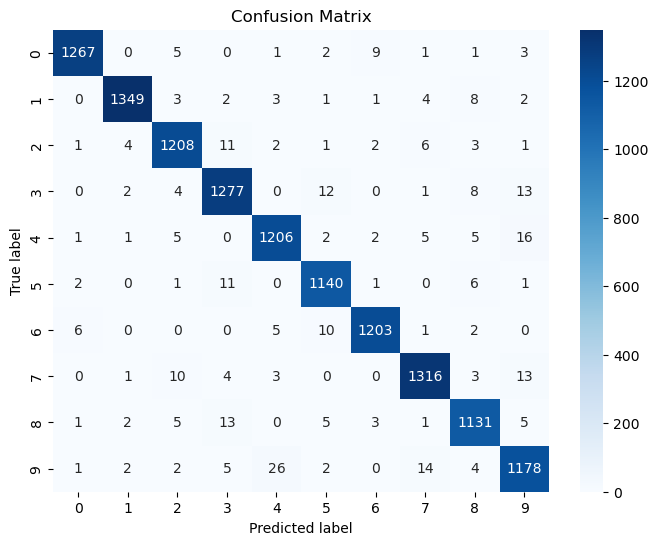

In [54]:
# Compute confusion matrix
cm = confusion_matrix(y_pred , y_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()